Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

Read Dataset


In [3]:
df_dp= pd.read_csv("/cleaned_blinkit_delivery_performance.csv")

Display Dataset

In [4]:
df_dp

order_id  delivery_partner_id promised_time actual_time  \
0     1961864118                63230      08:52:01    08:47:01   
1     1549769649                14983      13:25:29    13:27:29   
2     9185164487                39859      13:25:12    13:29:12   
3     9644738826                61497      16:34:56    16:33:56   
4     5427684290                84315      05:17:39    05:18:39   
...          ...                  ...           ...         ...   
4565  1669690997                90914      16:05:20    16:10:20   
4566  8340761903                27952      09:38:43    09:36:43   
4567  5936301790                 9590      19:23:09    19:26:09   
4568  5710579377                29940      15:12:13    15:10:13   
4569  2494813730                32851      12:20:18    12:21:18   

      delivery_time_minutes  distance_km delivery_status reasons_if_delayed  \
0                       5.0         0.96         On Time           No Delay   
1                       2.0         0.98         On Time            Traffic   
2                       4.0         3.83         On Time            Traffic   
3                       1.0         2.76         On Time           No Delay   
4                       1.0         2.63         On Time            Traffic   
...                     ...          ...             ...                ...   
4565                    5.0         1.86         On Time            Traffic   
4566                    2.0         3.31         On Time           No Delay   
4567                    3.0         2.44         On Time            Traffic   
4568                    2.0         1.76         On Time           No Delay   
4569                    1.0         2.70         On Time            Traffic   

     promised_date actual_date  
0       2024-07-17  2024-07-17  
1       2024-05-28  2024-05-28  
2       2024-09-23  2024-09-23  
3       2023-11-24  2023-11-24  
4       2023-11-20  2023-11-20  
...            ...         ...  
4565    2023-12-25  2023-12-25  
4566    2023-11-27  2023-11-27  
4567    2024-06-21  2024-06-21  
4568    2024-06-06  2024-06-06  
4569    2023-08-23  2023-08-23  

[4570 rows x 10 columns]


Display dataset summary (structure, data types, memory usage) and check for missing values in columns



In [5]:
df_dp.info()
print(df_dp.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               4570 non-null   int64  
 1   delivery_partner_id    4570 non-null   int64  
 2   promised_time          4570 non-null   object 
 3   actual_time            4570 non-null   object 
 4   delivery_time_minutes  4570 non-null   float64
 5   distance_km            4570 non-null   float64
 6   delivery_status        4570 non-null   object 
 7   reasons_if_delayed     4570 non-null   object 
 8   promised_date          4570 non-null   object 
 9   actual_date            4570 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 357.2+ KB
order_id                 0
delivery_partner_id      0
promised_time            0
actual_time              0
delivery_time_minutes    0
distance_km              0
delivery_status          0
reasons_if_delay

Delivery Performance and Status Distribution


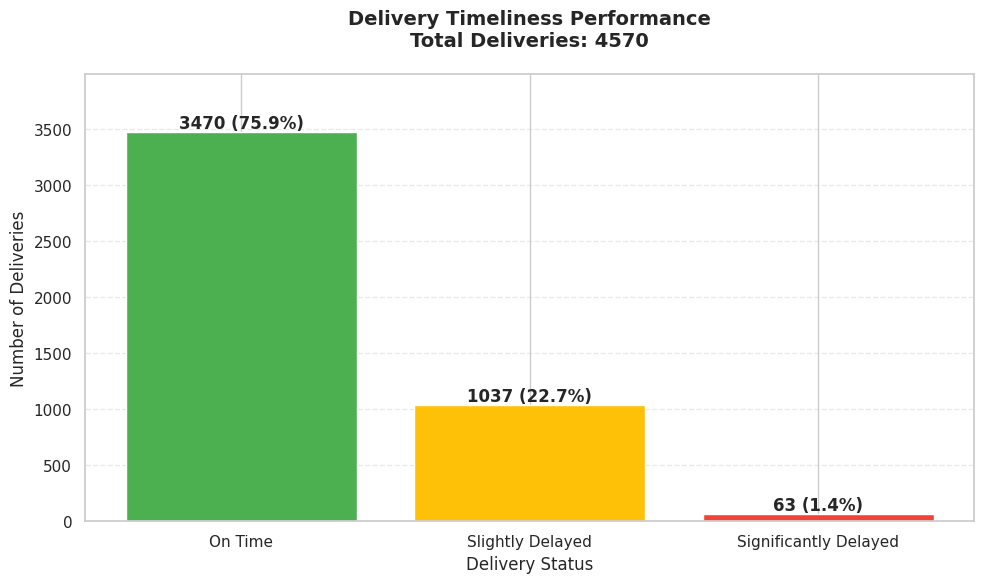

In [6]:
# Define delivery statuses and their respective counts
status_labels = ['On Time', 'Slightly Delayed', 'Significantly Delayed']
status_counts = [df_dp[df_dp["delivery_status"] == label].shape[0] for label in status_labels]
colors = ['#4CAF50', '#FFC107', '#F44336']  # Green, Yellow, Red

# Calculate percentages
total_deliveries = sum(status_counts)
status_percentages = [count / total_deliveries * 100 for count in status_counts]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(status_labels, status_counts, color=colors)

# Format chart
plt.title(f'Delivery Timeliness Performance\nTotal Deliveries: {total_deliveries}', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)

# Add values and percentages above bars
for bar, percentage in zip(bars, status_percentages):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height()} ({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(status_counts) * 1.15)
plt.tight_layout()
plt.show()

1- What are the main reasons for delivery delays?

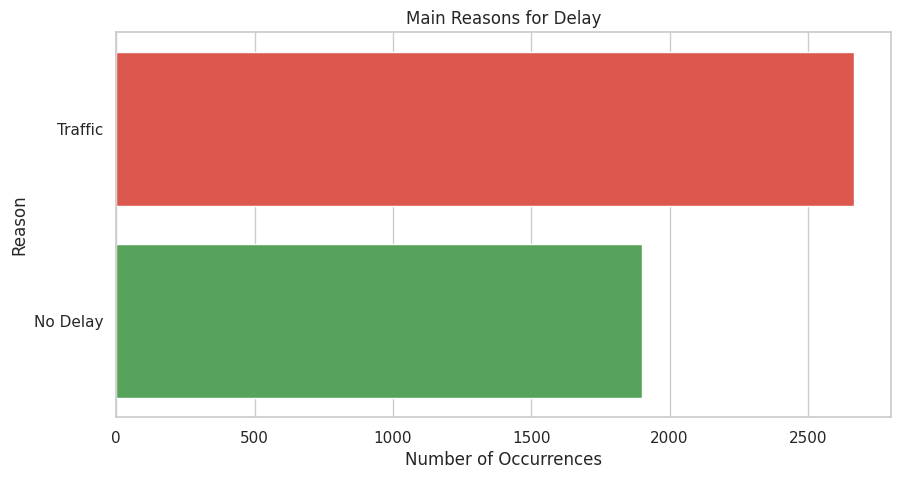

In [7]:
# Count occurrences of delay reasons
delay_reasons = df_dp['reasons_if_delayed'].value_counts()

# Create a simple bar chart with specific colors
plt.figure()

# First bar (Red) & Second bar (Green)
sns.barplot(x=delay_reasons.values[:1], y=delay_reasons.index[:1], color='#F44336')  # Red
sns.barplot(x=delay_reasons.values[1:2], y=delay_reasons.index[1:2], color='#4CAF50')  # Green

# Add chart labels
plt.title('Main Reasons for Delay')
plt.xlabel("Number of Occurrences")
plt.ylabel("Reason")

plt.show()

2- How is delivery time categorized, and what percentage of orders fall into each category?

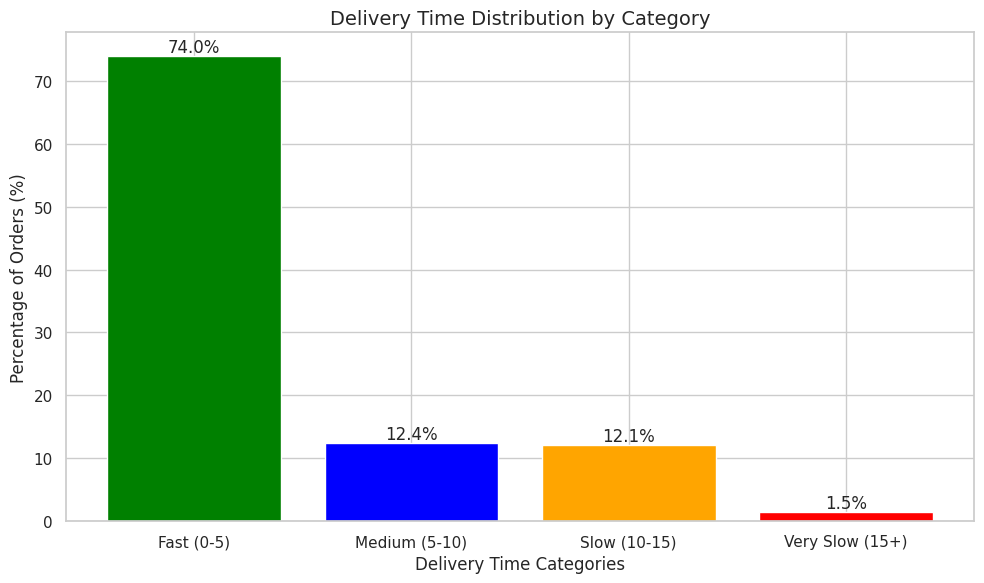

In [8]:
bins = [0, 5, 10, 15, 20]
labels = ['Fast (0-5)', 'Medium (5-10)', 'Slow (10-15)', 'Very Slow (15+)']
df_dp['delivery_category'] = pd.cut(df_dp['delivery_time_minutes'], bins=bins, labels=labels)

# Calculate percentages
category_percentages = df_dp['delivery_category'].value_counts(normalize=True)*100

# bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_percentages.index, category_percentages, color=['green', 'blue', 'orange', 'red'])

# labels and title
plt.title('Delivery Time Distribution by Category', fontsize=14)
plt.xlabel('Delivery Time Categories', fontsize=12)
plt.ylabel('Percentage of Orders (%)', fontsize=12)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

3- What is the relationship between delivery time and the overall average time?

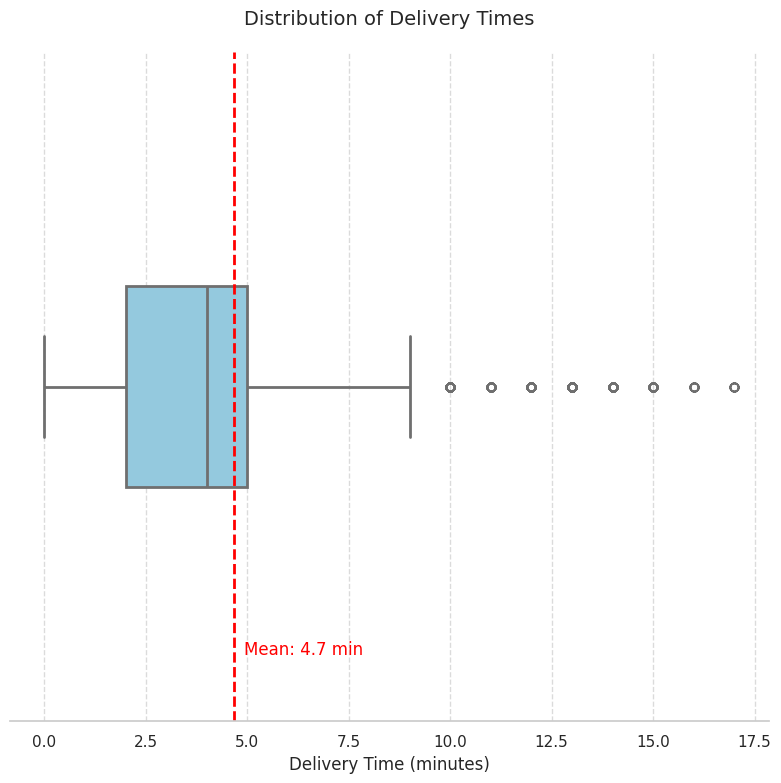

In [9]:
average_delivery_time = df_dp['delivery_time_minutes'].mean()

plt.figure(figsize=(8, 8))

boxplot = sns.boxplot(x=df_dp['delivery_time_minutes'],
                     color='skyblue',
                     width=0.3,
                     linewidth=2)

plt.title("Distribution of Delivery Times", fontsize=14, pad=20)
plt.xlabel('Delivery Time (minutes)', fontsize=12)

# mean reference line
plt.axvline(average_delivery_time, color='red', linestyle='--', linewidth=2)
plt.text(average_delivery_time*1.05, 0.4, f'Mean: {average_delivery_time:.1f} min',
         color='red', fontsize=12)


plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True)

plt.tight_layout()
plt.show()

4- Is there a relationship between distance and delivery delays?

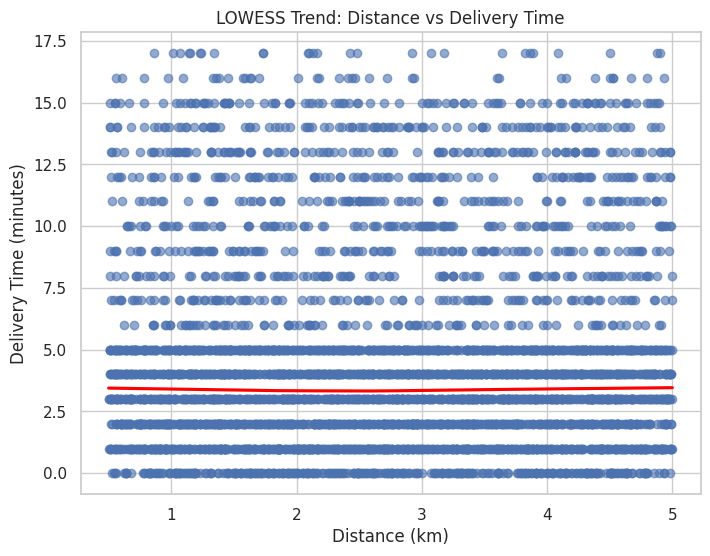

Pearson correlation: 0.01
The correlation between distance and delivery time is very weak (0.01), indicating no significant linear relationship.


In [10]:
# Exploring the Link Between Distance and Delivery Time (Linear or Non-Linear)

plt.figure(figsize=(8, 6))
sns.regplot(data=df_dp, x='distance_km', y='delivery_time_minutes',
            scatter_kws={'alpha': 0.6}, lowess=True, line_kws={'color': 'red'})
plt.title("LOWESS Trend: Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()
corr = df_dp['distance_km'].corr(df_dp['delivery_time_minutes'])
print(f"Pearson correlation: {corr:.2f}")
print ("The correlation between distance and delivery time is very weak (0.01), indicating no significant linear relationship.")



5- Is there a relationship between drivers and delivery delay statuses

In [11]:
# Filter orders classified as "Significantly Delayed" or "Slightly Delayed"
delayed_orders = df_dp[df_dp["delivery_status"].isin(["Significantly Delayed", "Slightly Delayed"])]

# Count delayed deliveries per driver
driver_delay_counts = delayed_orders.groupby("delivery_partner_id").size().reset_index(name="Delayed Orders")

print(driver_delay_counts)
print (" There is no correlation between the driver and delivery delay..")

      delivery_partner_id  Delayed Orders
0                     102               1
1                     187               1
2                     289               1
3                     307               1
4                     388               1
...                   ...             ...
1095                99752               1
1096                99820               1
1097                99889               1
1098                99898               1
1099                99968               1

[1100 rows x 2 columns]
 There is no correlation between the driver and delivery delay..
